## Analyzing how complexity of a board game correlates with its rating.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
df = pd.read_csv('bgg_dataset_board.csv', delimiter= ';')

In [13]:
df = df.drop(columns=['ID', 'Name', 'Year Published', 'Mechanics', 'Domains'])

In [14]:
print(df.isnull().sum())

Min Players            0
Max Players            0
Play Time              0
Min Age                0
Users Rated            0
Rating Average         0
BGG Rank               0
Complexity Average     0
Owned Users           23
dtype: int64


In [50]:
df = df.dropna(subset=['Complexity Average', 'Rating Average'])
df['Complexity Average'] = pd.to_numeric(df['Complexity Average'])
df['Rating Average'] = pd.to_numeric(df['Rating Average'])

In [17]:
df = df.dropna(subset=['Complexity Average', 'Rating Average'])

In [21]:
df.describe()

,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.300000,4.300000,33.000000,9.200000,40.900000,6.000000,14760.900000,1.200000,86.400000
std,0.674949,2.406011,29.925834,4.211096,9.971626,1.333333,3015.616666,1.135292,39.814012
min,2.000000,0.000000,0.000000,0.000000,30.000000,3.000000,10573.000000,0.000000,25.000000
25%,2.000000,2.500000,11.250000,7.250000,32.750000,6.000000,12992.250000,0.250000,56.500000
50%,2.000000,4.500000,25.000000,9.000000,40.000000,6.000000,14879.000000,1.000000,83.000000
75%,2.000000,6.000000,56.250000,12.000000,46.500000,6.750000,15694.250000,1.750000,110.000000
max,4.000000,8.000000,90.000000,14.000000,61.000000,8.000000,19929.000000,3.000000,145.000000


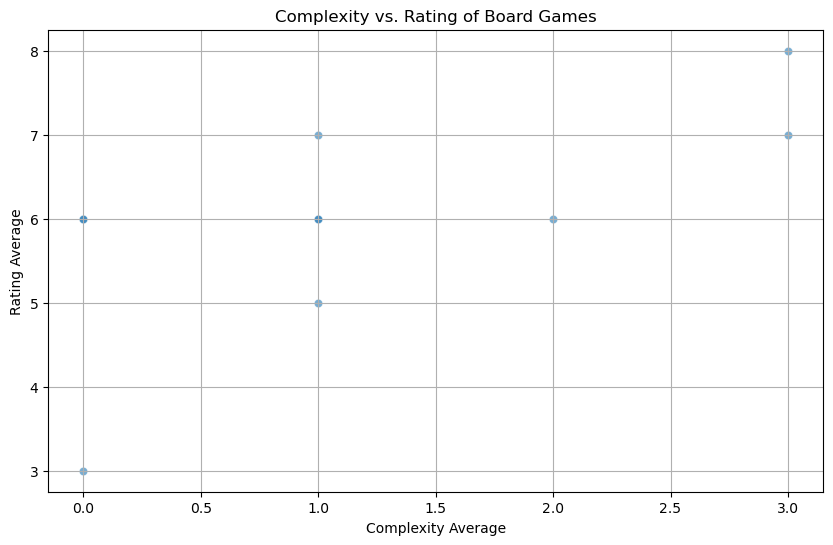

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Complexity Average', y='Rating Average', data=df, alpha=0.6)
plt.title('Complexity vs. Rating of Board Games')
plt.xlabel('Complexity Average')
plt.ylabel('Rating Average')
plt.grid(True)
plt.show()

In [22]:
X = df[['Complexity Average']].values  
y = df['Rating Average'].values        

# Fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.7758620689655169
Intercept: 5.06896551724138


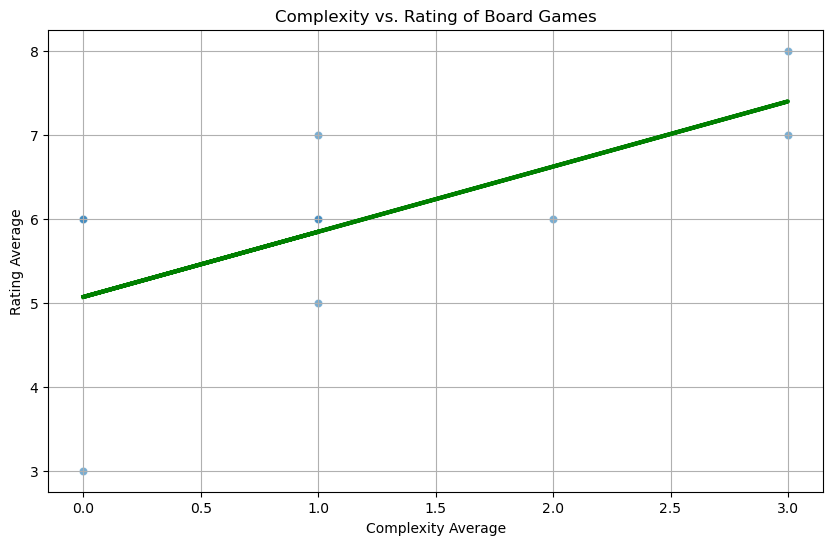

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Complexity Average', y='Rating Average', data=df, alpha=0.6)
plt.plot(df['Complexity Average'], model.predict(X), color='green', linewidth=3)

plt.title('Complexity vs. Rating of Board Games')
plt.xlabel('Complexity Average')
plt.ylabel('Rating Average')
plt.grid(True)
plt.show()

In [26]:
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.44


## Predict the average rating of a board game based on features such as players,playtime, and complexity

In [93]:
df2 = pd.read_csv('bgg_dataset_board.csv', delimiter=';')

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.2+ MB


In [97]:
df_cleaned = df2.drop(columns=['ID', 'Name', 'Year Published', 'BGG Rank', 'Rating Average', 'Users Rated', 'Owned Users'])

In [102]:
df_cleaned.isnull().sum()

Min Players           0
Max Players           0
Play Time             0
Min Age               0
Complexity Average    0
Mechanics             0
Domains               0
dtype: int64

In [99]:
df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True)
df_cleaned.fillna('Unknown', inplace=True)

In [103]:
df_cleaned.isnull().sum()

Min Players           0
Max Players           0
Play Time             0
Min Age               0
Complexity Average    0
Mechanics             0
Domains               0
dtype: int64

In [104]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Mechanics', 'Domains'], drop_first=True)

In [106]:
df_cleaned.shape

(20343, 7425)

In [107]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = ['Min Players', 'Max Players', 'Play Time', 'Min Age']

In [108]:
scaler = StandardScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

In [109]:
df_cleaned.head()

,Min Players,Max Players,Play Time,Min Age,Complexity Average,"Mechanics_Acting, Action Points, Betting and Bluffing, Card Drafting, Commodity Speculation, Dice Rolling, Hand Management, Memory, Push Your Luck, Role Playing, Set Collection, Storytelling, Team-Based Game, Trading, Variable Player Powers","Mechanics_Acting, Action Queue","Mechanics_Acting, Area Majority / Influence, Deck Bag and Pool Building, Dice Rolling, Trading, Voting, Worker Placement","Mechanics_Acting, Area Movement, Card Drafting, Player Elimination","Mechanics_Acting, Area Movement, Role Playing, Team-Based Game, Variable Player Powers",...,"Domains_Party Games, Thematic Games","Domains_Party Games, Wargames",Domains_Strategy Games,"Domains_Strategy Games, Thematic Games","Domains_Strategy Games, Thematic Games, Wargames","Domains_Strategy Games, Wargames",Domains_Thematic Games,"Domains_Thematic Games, Wargames",Domains_Unknown,Domains_Wargames
0,-1.477097,-0.109791,0.052629,1.206604,"3,86",False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,-0.028554,-0.109791,-0.057376,0.932283,"2,84",False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,-0.028554,-0.109791,0.052629,1.206604,"3,91",False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,-1.477097,-0.044135,0.052629,0.657962,"3,24",False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1.419990,0.021520,0.712654,1.206604,"4,22",False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [110]:
print("Final DataFrame shape:", df_cleaned.shape)
print("Final DataFrame columns:", df_cleaned.columns)

df_cleaned.to_csv('cleaned_dataset.csv', index=False)

Final DataFrame shape: (20343, 7425)
Final DataFrame columns: Index(['Min Players', 'Max Players', 'Play Time', 'Min Age',
       'Complexity Average',
       'Mechanics_Acting, Action Points, Betting and Bluffing, Card Drafting, Commodity Speculation, Dice Rolling, Hand Management, Memory, Push Your Luck, Role Playing, Set Collection, Storytelling, Team-Based Game, Trading, Variable Player Powers',
       'Mechanics_Acting, Action Queue',
       'Mechanics_Acting, Area Majority / Influence, Deck Bag and Pool Building, Dice Rolling, Trading, Voting, Worker Placement',
       'Mechanics_Acting, Area Movement, Card Drafting, Player Elimination',
       'Mechanics_Acting, Area Movement, Role Playing, Team-Based Game, Variable Player Powers',
       ...
       'Domains_Party Games, Thematic Games', 'Domains_Party Games, Wargames',
       'Domains_Strategy Games', 'Domains_Strategy Games, Thematic Games',
       'Domains_Strategy Games, Thematic Games, Wargames',
       'Domains_Strategy Ga